# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- "Globale Suizidraten"
### 1.2 Fragestellung:
- "In welchem Land hat sich die Suizidrate pro 100'000 Einwohner in den letzten 10 Jahren am meiten gesteigert."   
### 1.3 Datenquelle(n):
Beispiele für mögliche Datenquellen:
- https://ourworldindata.org/suicide




### 1.4 Daten beschaffen und laden

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('death-rate-from-suicides-gho.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','Suizidrate']) 
df.head() 

,Gebiet,Code,Jahr,Suizidrate
0,Afghanistan,AFG,2000,7.197108
1,Afghanistan,AFG,2001,7.281792
2,Afghanistan,AFG,2002,7.123594
3,Afghanistan,AFG,2003,7.053904
4,Afghanistan,AFG,2004,7.034545


## 2. Daten vorbereiten 
- Die Roh-Daten befinden sich in einem Long Format
- Die Daten werden anhand eines Pivot Tables analysiert: 
- Relevant für die Fragestellung sind die Daten der letzten 10 Jahre. 

In [3]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr', values='Suizidrate')
df_pivot.head()

Jahr,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.197108,7.281792,7.123594,7.053904,7.034545,6.910225,6.608689,6.476178,6.302887,5.891947,...,5.774172,5.685669,5.535404,5.319865,5.322144,5.470633,5.424701,5.367804,5.324850,5.320608
Africa,10.093091,10.013195,10.017222,10.010037,9.915320,9.732854,9.715343,9.649155,9.645603,9.606206,...,9.522184,9.436768,9.414608,9.401263,9.310595,9.228361,9.374145,9.355742,9.379318,9.580948
Albania,5.104753,4.418037,4.479788,4.595087,4.502845,6.913495,6.862893,6.947456,6.954976,6.820407,...,4.092385,4.056547,3.798754,3.580979,3.450706,3.292069,3.141507,3.026028,2.507422,2.143994
Algeria,4.140792,3.921089,3.803862,3.521953,3.327965,3.218484,3.081167,2.945067,2.815762,2.683964,...,2.364761,2.327027,2.295923,2.225488,2.135747,2.136896,2.172493,2.170682,1.848795,2.320863
Andorra,9.685721,10.776894,10.718483,9.985846,11.859435,10.398196,10.702955,10.374284,10.033582,9.822695,...,8.119903,9.338710,9.277415,9.163852,9.708513,8.330241,7.659383,8.645201,12.004116,5.742578


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Die Daten dieser Arbeit sind diskrete Daten

- Die Spalte *Gebiete* enthält 201 verschieden Gebiete
- Die Spalte *Codes* enthält 196 verschiedene Codes
- Es sind Daten zwischen 2000 and 2021 vorhanden. Die Daten sind seit dem Zeitpunkt der Datenerhebung in 2000 vollständig.
- Die Suizidrate pro 100'000 Einwohner streut zwischen 0 und 47.8 Personen.

- Die Verteilung des Histogrames beim Punkt 3.4, zeigt eine allgemein schöne Verteilung. Der Mittelwert und Median sind nahe beieinander. Über alle Säulendiagramme hinweg beobachtet man eine regelmässige Datenverteilung.
- Einen Zusammenhang der 22 Datenpunkte und 22 Ländercodes pro Land kann erkennt werden. Dies ist vermutlich so, wegen den allgemeinen 22 Datenpunkte pro Land. (Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix))

In [4]:
df.dtypes

Gebiet         object
Code           object
Jahr            int64
Suizidrate    float64
dtype: object

### 3.1 Analyse Gebiete

In [5]:
print('Anzahl verschiedener Gebiete: ', len(df['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  201


In [6]:
df['Gebiet'].value_counts()

Gebiet
Afghanistan    22
Palau          22
Niger          22
Nigeria        22
Niue           22
               ..
Ghana          22
Greece         22
Grenada        22
Guatemala      22
Zimbabwe       22
Name: count, Length: 201, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

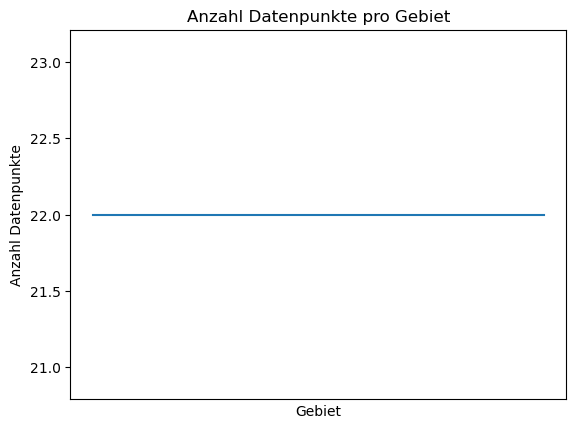

In [28]:
df['Gebiet'].value_counts().plot(kind='line', 
                                 xticks=[],     # disable labels on x-axis
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

### 3.2 Analyse codes

In [8]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  196


In [9]:
df['Code'].value_counts()

Code
AFG    22
LCA    22
NIC    22
NER    22
NGA    22
       ..
GHA    22
GRC    22
GRD    22
GTM    22
ZWE    22
Name: count, Length: 195, dtype: int64

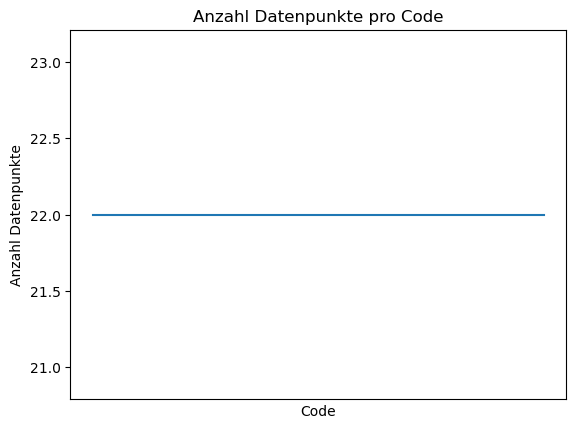

In [29]:
df['Code'].value_counts().plot(kind='line',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

### 3.3 Analyse Jahre

In [11]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  22


In [12]:
df['Jahr'].value_counts().sort_index()

Jahr
2000    201
2001    201
2002    201
2003    201
2004    201
2005    201
2006    201
2007    201
2008    201
2009    201
2010    201
2011    201
2012    201
2013    201
2014    201
2015    201
2016    201
2017    201
2018    201
2019    201
2020    201
2021    201
Name: count, dtype: int64

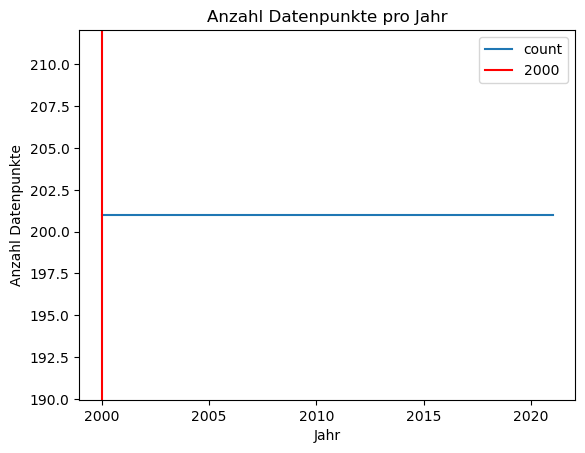

In [33]:
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=2000, color='red',label='2000') # rote Linie bei 2000 - ab hier sind alle Jahre enthalten
g.legend()  # Legende anzeigen

### 3.4 Analyse Suizide

In [14]:
df.describe()

,Jahr,Suizidrate
count,4422.000000,4422.000000
mean,2010.500000,10.522733
std,6.345006,6.998967
min,2000.000000,0.000000
25%,2005.000000,5.339155
50%,2010.500000,9.574253
75%,2016.000000,13.685492
max,2021.000000,47.826057


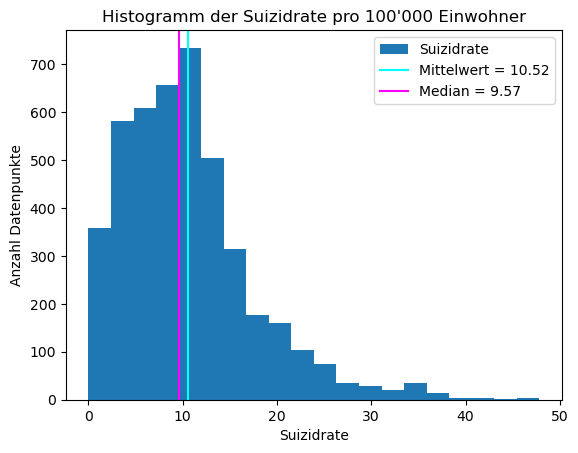

In [42]:
g = df['Suizidrate'].plot(kind='hist', bins=20, title="Histogramm der Suizidrate pro 100'000 Einwohner", 
                           xlabel='Suizidrate', ylabel='Anzahl Datenpunkte')
mean = df['Suizidrate'].mean()
g.axvline(x=df['Suizidrate'].mean(), color='aqua',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df['Suizidrate'].median()
g.axvline(x=df['Suizidrate'].median(), color='magenta',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()


## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



### Beobachtungen

### Interpretation

### Berechnungen

In [16]:
diffs = df_pivot[2021]-df_pivot[2011]   # Differenz zwischen 2021 und 2011
diffs = diffs.sort_values().dropna()  # sortieren nach Differenz und NaN-Werte entfernen
diffs

Gebiet
Belarus       -17.123154
Lithuania     -15.306593
Russia        -11.954531
Kazakhstan    -11.446339
Botswana       -8.139555
                 ...    
Zimbabwe        3.122973
South Sudan     4.096468
Uruguay         6.943131
Eswatini        6.982892
Thailand        7.047281
Length: 201, dtype: float64

<Axes: title={'center': 'Grösste und kleinste Differenzen der Suizidrate 2011-2021'}, ylabel='Gebiet'>

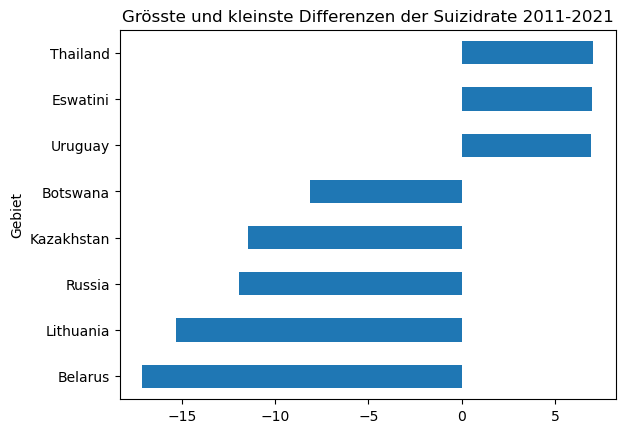

In [17]:
diff_sel = (diffs < -8) | (diffs > 5)  # Auswahl der grössten und kleinsten Differenzen
diffs[diff_sel].plot(kind='barh', title='Grösste und kleinste Differenzen der Suizidrate 2011-2021')

In [18]:
Gebiets_liste = diffs[diff_sel].index.tolist()  # Liste der Gebiete mit grössten und kleinsten Differenzen
print(Gebiets_liste)

['Belarus', 'Lithuania', 'Russia', 'Kazakhstan', 'Botswana', 'Uruguay', 'Eswatini', 'Thailand']


### Visualisierung

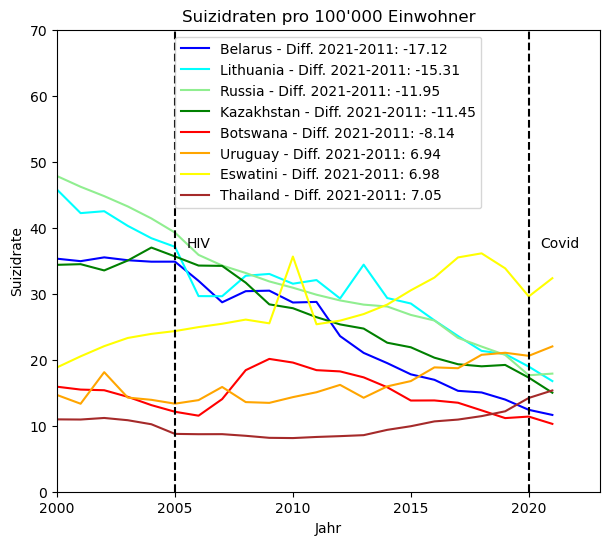

In [19]:
color_dict = {
    'Belarus': 'blue',
    'Lithuania': 'cyan',
    'Russia': 'lightgreen',
    'Kazakhstan': 'green',
    'Botswana': 'red',
    'Uruguay': 'orange',
    'Eswatini': 'yellow',
    'Thailand': 'brown',
}

for gebiet in Gebiets_liste:
    diff = diffs[gebiet]
    g = df_pivot.loc[gebiet].plot(title="Suizidraten pro 100'000 Einwohner", xlabel='Jahr', ylabel=f'Suizidrate', legend=True,
                                  label=f'{gebiet} - Diff. 2021-2011: {diff:.2f}', # für die Legende
                                  xlim=[2000,2023], ylim=[0,70],   # x- und y-Achsen begrenzen
                                  color=color_dict[gebiet],        # Farbe aus color_dict
                                  figsize=(7,6))                   # Grösse des Plots

# Covid Pandemie    
g.axvline(x=2020, color='black', linestyle='--') 
g.text(2020.5, 37, 'Covid')  

# HIV Pandemie
g.axvline(x=2005, color='black', linestyle='--')  
g.text(2005.5, 37, 'HIV');